# Dataset Sloan Digital Sky Survey DR14
## 1.- Comprendiendo los datos:
* ra, dec : ascensión recta y declinación (sistema ecuatorial de coordendas)
* u,g,r,i,z : filtros
* run, rerun, camcol, field - descriptores de campos (2048 x 1489 píxeles aprox)
* redshift: aumento de la longitud de onda debido al movimiento del objeto astronómico por efecto doppler
* plate : número de placa
* mjd : fecha de observación 
* fiberid : fibra óptica

## 2.- Data Clean

In [ ]:
#!pip install pydot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

from sklearn.tree import export_graphviz
import pydot

from xgboost import XGBClassifier

import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("./dataset.txt",sep=",")

In [3]:
data.head(5)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [5]:
data.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

* no hay perdida de datos

In [6]:
data["class"].value_counts()

class
GALAXY    4998
STAR      4152
QSO        850
Name: count, dtype: int64

In [7]:
#verificar el porcentaje datos de los targets.

p_galaxy = data["class"].value_counts()[0]/100
p_star = data["class"].value_counts()[1]/100
p_qso = data["class"].value_counts()[2]/100

print("porcentaje de galaxias reconocidas: "+str(p_galaxy)+"%")
print("porcentaje de estrellas reconocidas: "+str(p_star)+"%")
print("porcentaje de quasares reconocidos: "+str(p_qso)+"%")


porcentaje de galaxias reconocidas: 49.98%
porcentaje de estrellas reconocidas: 41.52%
porcentaje de quasares reconocidos: 8.5%


Se analizaran cuales variables estan mayormente relacionadas para considerarlas en el modelo final.

In [8]:
# Crear LabelEncoder
le = LabelEncoder()

# Ajustar y transformar la columna categorical
data["class"] = le.fit_transform(data["class"])

data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,2,0.000590,3306,54922,512


In [9]:
def better_heatmap(df):
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Generar el heatmap base 
    corr = df.corr()
    sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidths=.5, 
            ax=ax)
    
    # Decoraciones cosmeticas
    ax.set_title("Correlation Matrix", fontdict={'fontsize':14}, pad=10);
    ax.tick_params(labelsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0) 

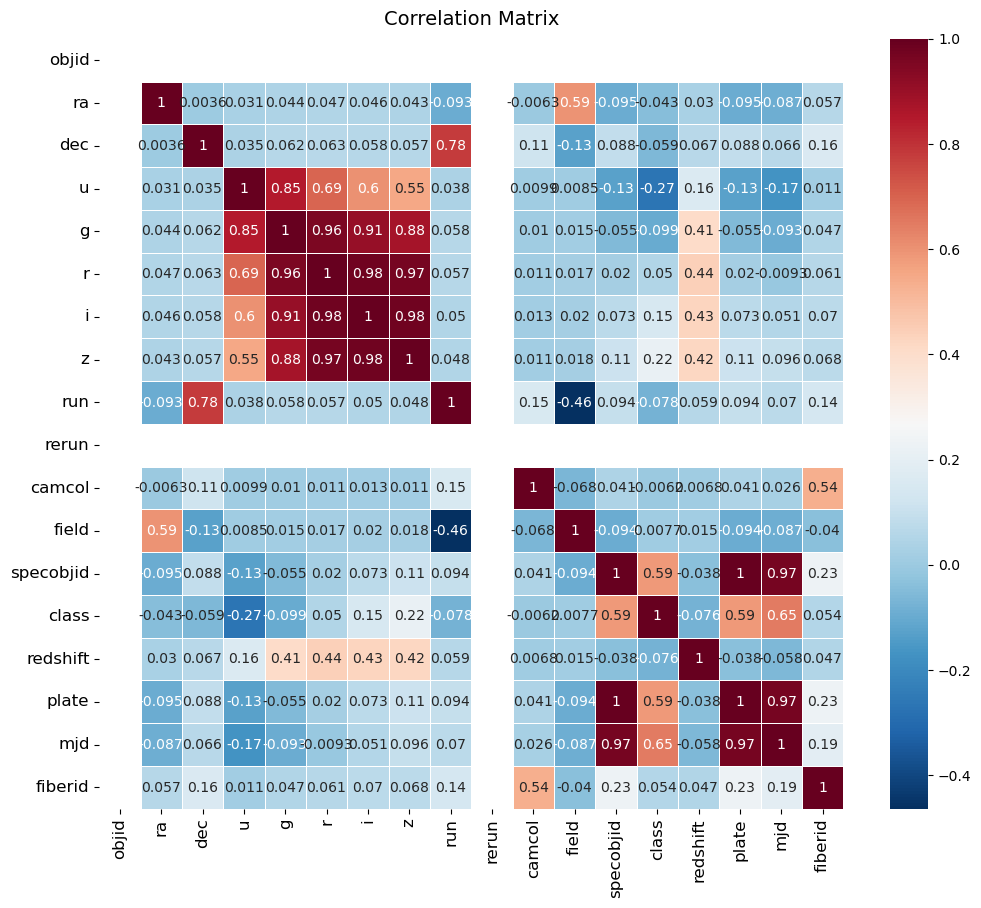

In [10]:
better_heatmap(data)
plt.show()

In [11]:
#seleccion de Features.
TARGET = ['class']
NOFEATURES = ['objid', 'run', 'rerun', 'camcol','field','plate','specobjid']
NOFEATURES = TARGET + NOFEATURES
FEATURES = data.columns.values
FEATURES = [col for col in FEATURES if col not in NOFEATURES]
np.array(FEATURES)

array(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'mjd', 'fiberid'],
      dtype='<U8')

In [12]:
features = data[FEATURES]
target  = data[TARGET]

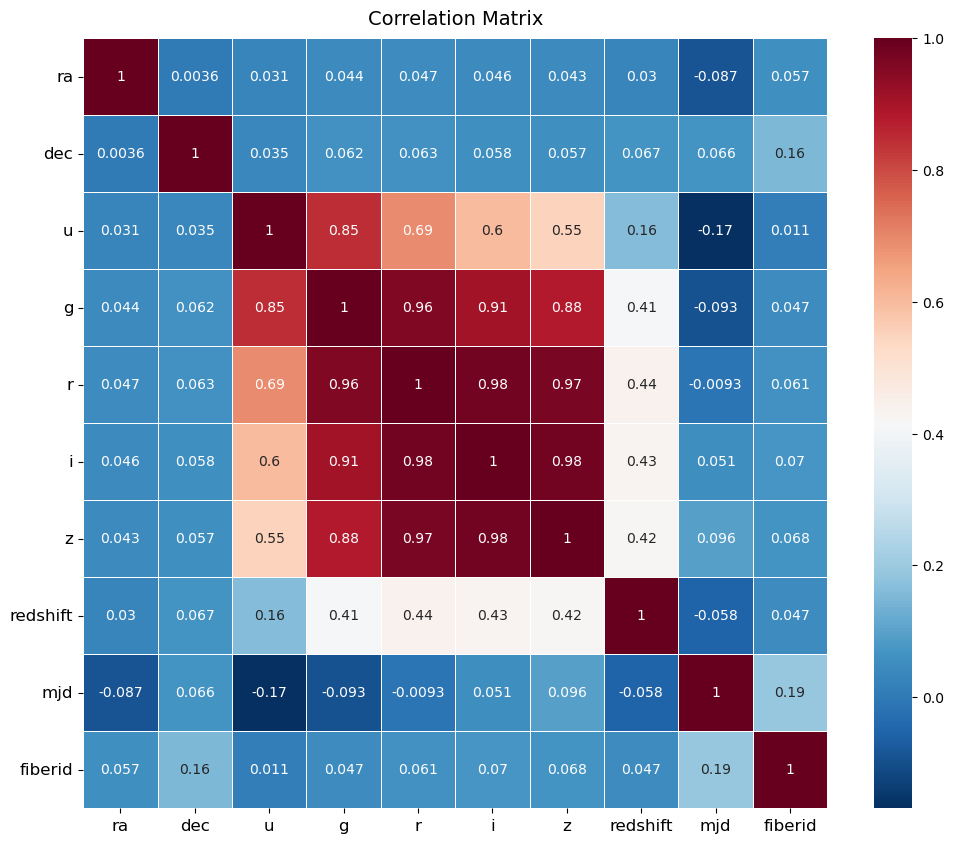

In [13]:
better_heatmap(features)
plt.show()

## Visualizaciones representativas de los datos

Exploramos la distribucion de densidad de los datos


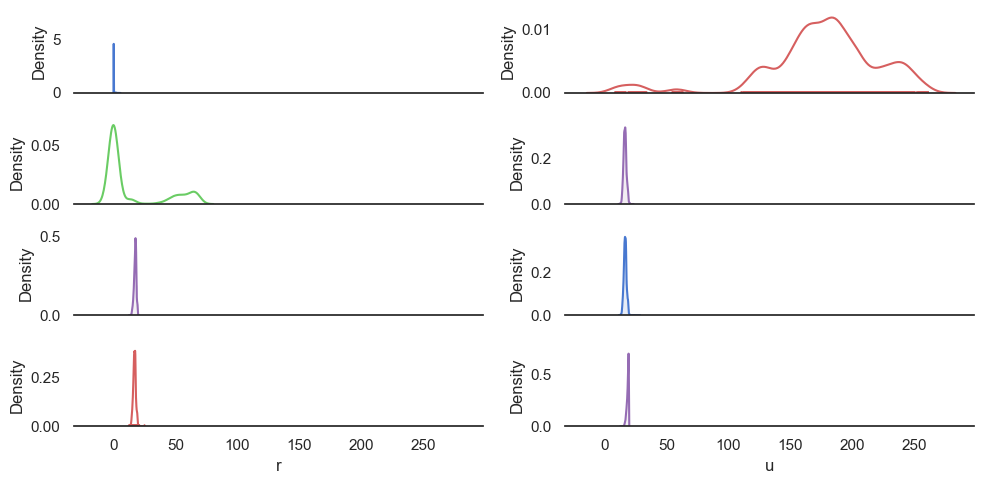

In [14]:
sns.set(style="white", palette="muted", color_codes=True)

f, axes = plt.subplots(4,2, figsize=(10, 5), sharex=True)
sns.despine(left=True)
sns.distplot(features["redshift"],  color="b", ax=axes[0, 0])
sns.distplot(features["ra"], hist=False, rug=True, color="r", ax=axes[0, 1])
sns.distplot(features["dec"], hist=False, color="g", ax=axes[1, 0])
sns.distplot(features["z"], color="m", ax=axes[1, 1])
sns.distplot(features["g"], color="m", ax=axes[2, 0])
sns.distplot(features["i"],  color="b", ax=axes[2, 1])
sns.distplot(features["r"], hist=False, rug=True, color="r", ax=axes[3, 0])
sns.distplot(features["u"], color="m", ax=axes[3, 1])

#plt.setp(axes, yticks=[])
plt.tight_layout()                       
print("Exploramos la distribucion de densidad de los datos")

Text(0, 0.5, 'filtro Z')

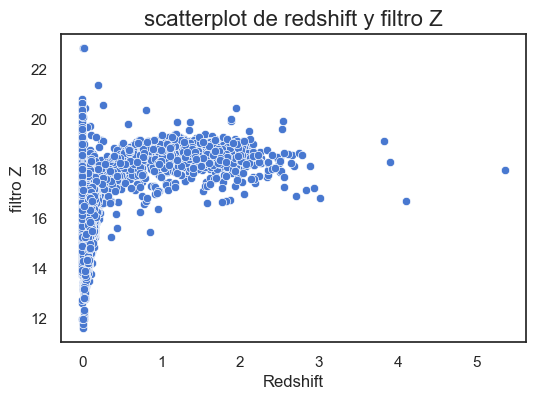

In [15]:
fig, ax = plt.subplots(figsize = ( 6 , 4 )) 
sns.scatterplot(ax=ax, x="redshift", y="z", data=features);
ax.set_title("scatterplot de redshift y filtro Z",size=16)
ax.set_xlabel("Redshift")
ax.set_ylabel("filtro Z")

Text(35.0, 0.5, 'distancia respecto que miramos el astro')

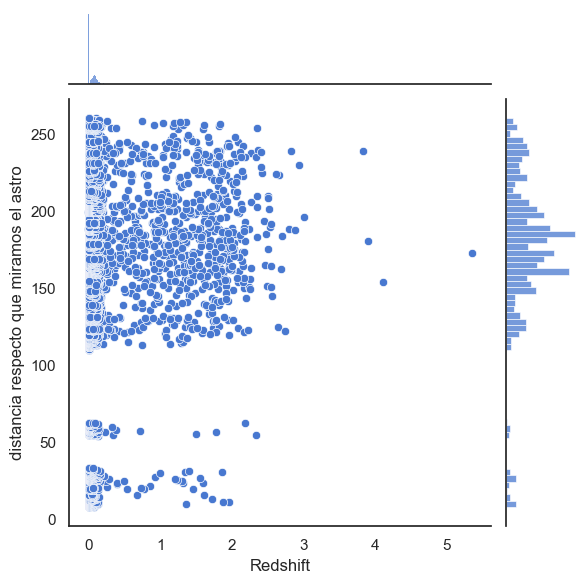

In [16]:
sns.jointplot(x="redshift", y="ra", data=features);
plt.xlabel("Redshift")
plt.ylabel("distancia respecto que miramos el astro")

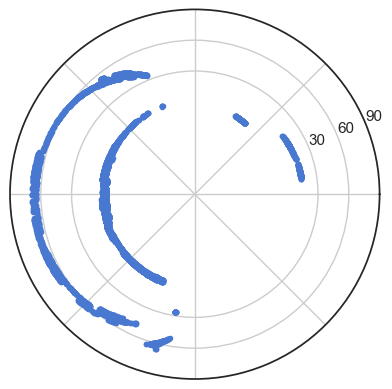

In [17]:
RA, DEC = np.meshgrid(features.ra, features.dec)
x = RA * np.cos(np.deg2rad(DEC))
y = DEC

fig, ax = plt.subplots(subplot_kw={'projection':'polar'})
ax.grid(True)
ax.set_xticklabels([])
ax.set_ylim(-90,90)  
ax.plot(np.deg2rad(features.ra), features.dec, ls='none', marker='.') 
ax.set_rmax(90)
ax.set_rticks([30, 60, 90]) 

plt.show()

Text(0.5, 1.0, 'histograma de filtro Redshift ')

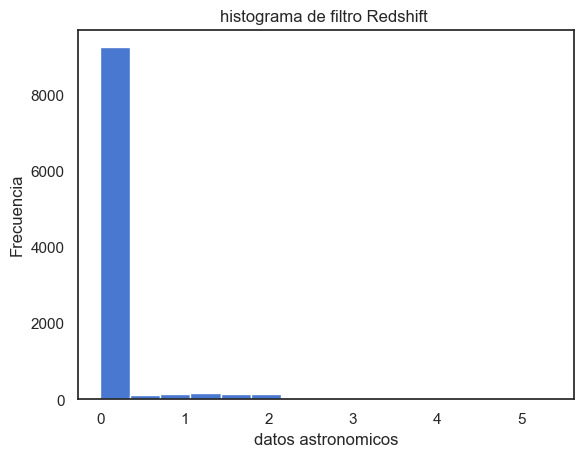

In [18]:
c = 1+ np.log2(10000)
plt.hist(features["redshift"], bins=int(np.ceil(c))) #bins  = [0,30,60,...]
plt.xlabel("datos astronomicos")
plt.ylabel("Frecuencia")
plt.title("histograma de filtro Redshift ")

## Se entrenan algunos modelos que permitan clasificar los Astros.


In [19]:
features.shape, target.shape

((10000, 10), (10000, 1))

In [22]:
# Dividimos los datos
X_train, X_test, y_train,y_test = train_test_split(features,target,
                                                   test_size=0.2, 
                                                   random_state=44)

In [25]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# XGBClassifier

In [26]:
xgb = XGBClassifier(n_estimators=300,reg_alpha=0.5,
                    reg_lambda=0.01,objective=['multi:softmax'])
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [27]:
predicts = xgb.predict(X_test)
xgb_cm =confusion_matrix(y_test,predicts)
print(xgb_cm)
print(classification_report(y_test,predicts))

[[996   2   2]
 [  5 179   0]
 [  0   0 816]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       0.99      0.97      0.98       184
           2       1.00      1.00      1.00       816

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



# RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.99

In [29]:
predicts = rfc.predict(X_test)
rfc_cm =confusion_matrix(y_test,predicts)
print(rfc_cm)
print(classification_report(y_test,predicts))

[[989   3   8]
 [  9 175   0]
 [  0   0 816]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.98      0.95      0.97       184
           2       0.99      1.00      1.00       816

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



##  Conclusion

La selección de características y los modelos construidos son capaces de clasificar los tipos de astros del conjunto de datos astronómicos *Sloan Digital Sky Survey DR14*.